In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from blimpy import read_header, Waterfall, Filterbank


%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.insert(0, "../../")
import setigen as stg

from astropy import units as u

In [3]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)
i = (frame.get_intensity(snr=20))
frame.get_snr(intensity=i)

20.0

In [61]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=1.396984*u.Hz,
                  dt=1.431656*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise_from_obs(share_index=False)
print(frame.noise_mean, frame.noise_std)
i = (frame.get_intensity(snr=20))
frame._update_noise_frame_stats()
print(frame.noise_mean, frame.noise_std)
frame.get_snr(intensity=i)

440979.7910322086 162190.85471014841
441022.4656865519 159645.9166166372


20.31882282333878

In [62]:
frame.noise_std / np.sqrt(32)

28221.67755709157

In [323]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=1.396984*u.Hz,
                  dt=1.431656*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise_from_obs(share_index=False)
print(frame.noise_mean, frame.noise_std)
i = (frame.get_intensity(snr=30))
# frame._update_noise_frame_stats()
# print(frame.noise_mean, frame.noise_std)

386143.87579390313 217267.20748786465


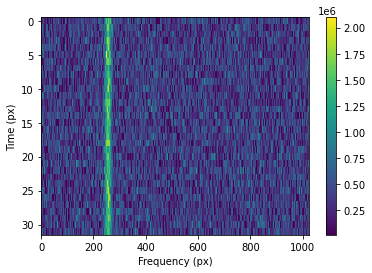

In [324]:
start_index = 256
end_index = 256*3

drift_rate = frame.get_drift_rate(start_index, end_index) * 0
 
signal = frame.add_signal(stg.constant_path(f_start = frame.fs[start_index], 
                                            drift_rate = drift_rate),
                          stg.constant_t_profile(level=i),
#                           stg.voigt_f_profile(g_width=30*u.Hz, l_width=30*u.Hz),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level = 1))
frame.render()

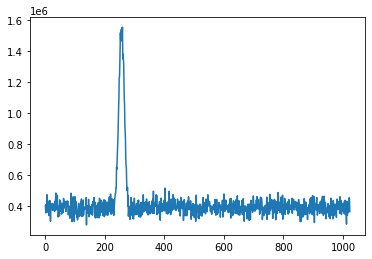

In [325]:
plt.plot(np.mean(frame.data, axis=0))

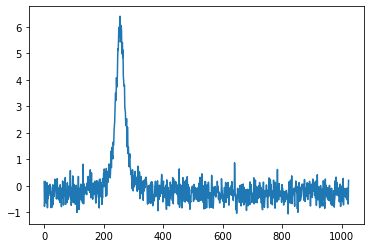

In [298]:
spectrum = np.mean(frame.data, axis=0)
spectrum = (spectrum - np.mean(spectrum)) / np.std(spectrum) #* frame.tchans**0.5
plt.plot(spectrum)

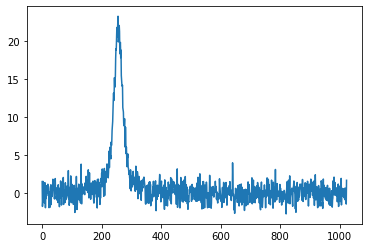

In [299]:
spectrum = np.mean(frame.data, axis=0)
spectrum = (spectrum - np.mean(spectrum[400:])) / np.std(spectrum[400:]) #* frame.tchans**0.5
plt.plot(spectrum)

In [343]:
def comp_stats(arr):
    #Compute mean and stddev of floating point vector array in a fast way, without using the outliers.

    new_vec = np.sort(arr,axis=None)

    #Removing the lowest 5% and highest 5% of data, this takes care of outliers.
    new_vec = new_vec[int(len(new_vec)*.05):int(len(new_vec)*.95)]
    the_median = np.median(new_vec)
    the_stddev = new_vec.std()

    return the_median, the_stddev

In [344]:
m, s = comp_stats(np.mean(frame.data, axis=0))
m, s

(393223.9788995559, 31839.547915689494)

36.46018847178989


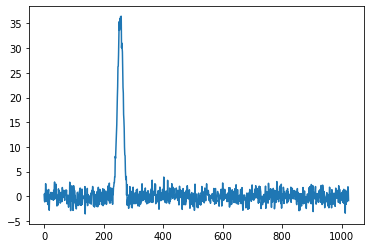

In [345]:
spectrum = np.mean(frame.data, axis=0)
spectrum = (spectrum - m) / s
plt.plot(spectrum)
print(max(spectrum))

In [329]:
spectrum = np.mean(frame.data, axis=0)
np.mean(spectrum), np.mean(spectrum[400:]), frame.mean(), frame.noise_mean

(416205.1825468285, 390952.87481743173, 416205.1825468285, 386143.87579390313)

In [330]:
spectrum = np.mean(frame.data, axis=0)
np.std(spectrum), np.std(spectrum[400:]), frame.std(), frame.noise_std

(147705.04910794707,
 36329.407360200115,
 253496.93111511564,
 217267.20748786465)

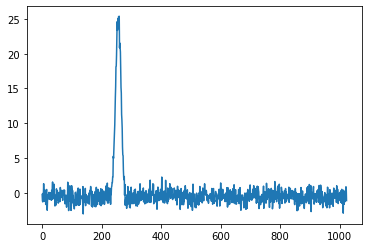

In [331]:
spectrum = np.mean(frame.data, axis=0)
spectrum = (spectrum - frame.mean()) / frame.std() * frame.tchans**0.5
plt.plot(spectrum)

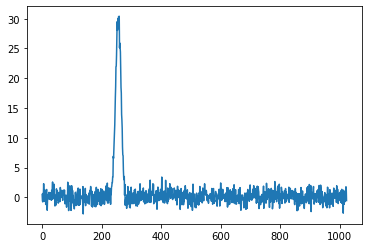

In [332]:
spectrum = np.mean(frame.data, axis=0)
spectrum = (spectrum - frame.noise_mean) / (frame.noise_std / frame.tchans**0.5)
plt.plot(spectrum)

In [307]:
frame.noise_mean, frame.noise_std

(458068.88758332934, 276821.85787463095)

In [198]:
spectrum = np.mean(frame.data, axis=0)
spectrum[400:].mean(), spectrum[400:].std()

(304713.86104124814, 40082.65490506771)

In [204]:
frame.data[:, 400:].std()

224881.31838960908

In [199]:
frame.noise_std / spectrum[400:].std()

6.415160176689407

In [201]:
30/32**0.5

5.303300858899106

In [92]:
frame._update_noise_frame_stats()
print(frame.noise_mean, frame.noise_std)
frame.get_snr(intensity=i)

497948.0066536579 236460.85530934233


29.532024224452247

In [93]:
np.mean(frame.get_data()), np.std(frame.get_data())

(530080.8608525286, 297098.6315961686)

In [94]:
i * np.sqrt(32) / np.std(frame.get_data())

23.504543489860524

In [95]:
np.std(frame.get_data()[:, :200])

228869.45836999276

In [96]:
i * np.sqrt(32) / np.std(frame.get_data()[:, :100])

30.765546504816406

In [265]:
import blimpy as bl

obs_fn = '/datax/scratch/bbrzycki/old/data/blc00_guppi_58331_12383_DIAG_SGR_B2_0014.gpuspec.0000.fil'
bl.read_header(obs_fn)

{b'rawdatafile': b'guppi_58331_12383_DIAG_SGR_B2_0014.0000.raw',
 b'source_name': b'DIAG_SGR_B2',
 b'machine_id': 20,
 b'telescope_id': 6,
 b'src_raj': <Angle 17.78900667 hourangle>,
 b'src_dej': <Angle -28.3854 deg>,
 b'az_start': 0.0,
 b'za_start': 0.0,
 b'data_type': 1,
 b'fch1': 3151.464842353016,
 b'foff': -2.7939677238464355e-06,
 b'nchans': 67108864,
 b'nbeams': 1,
 b'ibeam': 1,
 b'nbits': 32,
 b'tstart': 58331.14332175926,
 b'tsamp': 18.253611008,
 b'nifs': 1}

In [272]:
np.log(67108864)/np.log(2)

26.0

In [274]:
import time
start = time.time()
frame_itr = stg.split_waterfall_generator(obs_fn, fchans=2**20, tchans=32)
print(time.time() - start)

0.00017333030700683594


In [275]:
start = time.time()
frame = stg.Frame(next(frame_itr))
print(time.time() - start)

blimpy.io.file_wrapper INFO     Skipping loading data ...
15.103001832962036


In [276]:
start = time.time()

start_index = 256
end_index = 256*3

drift_rate = frame.get_drift_rate(start_index, end_index)

signal = frame.add_signal(stg.constant_path(f_start = frame.fs[start_index], 
                                            drift_rate = drift_rate),
                          stg.constant_t_profile(level = 100),
                          stg.voigt_f_profile(g_width=30*u.Hz, l_width=30*u.Hz),
                          stg.constant_bp_profile(level = 1))
print(time.time() - start)

21.89159631729126


In [277]:
start = time.time()

start_index = 256
end_index = 256*3

drift_rate = frame.get_drift_rate(start_index, end_index)

signal = frame.add_signal(stg.constant_path(f_start = frame.fs[start_index], 
                                            drift_rate = drift_rate),
                          stg.constant_t_profile(level = 100),
                          stg.voigt_f_profile(g_width=30*u.Hz, l_width=30*u.Hz),
                          stg.constant_bp_profile(level = 1),
                          bounding_f_range=(frame.fs[start_index],
                                            frame.fs[end_index])
                         )
print(time.time() - start)

0.2295823097229004
